<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-attempt-working-with-etherscan" data-toc-modified-id="First-attempt-working-with-etherscan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First attempt working with etherscan</a></span><ul class="toc-item"><li><span><a href="#1)-Get-the-balance-of-an-individual-account:" data-toc-modified-id="1)-Get-the-balance-of-an-individual-account:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1) Get the balance of an individual account:</a></span></li><li><span><a href="#2)-Let's-get-a-list-of-'normal'-transactions-from-this-address" data-toc-modified-id="2)-Let's-get-a-list-of-'normal'-transactions-from-this-address-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2) Let's get a list of 'normal' transactions from this address</a></span><ul class="toc-item"><li><span><a href="#Here's-what-the-new-page-looks-like-(w/-JSON-formatter-chrome-extension)" data-toc-modified-id="Here's-what-the-new-page-looks-like-(w/-JSON-formatter-chrome-extension)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Here's what the new page looks like (w/ JSON formatter chrome extension)</a></span></li></ul></li><li><span><a href="#The-other-notebook-in-this-file-will-attempt-to-do-something-similar-with-ERC721-tokens" data-toc-modified-id="The-other-notebook-in-this-file-will-attempt-to-do-something-similar-with-ERC721-tokens-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The other notebook in this file will attempt to do something similar with ERC721 tokens</a></span></li></ul></li></ul></div>

# First attempt working with etherscan

Some links:
- address search (for attempt #1): https://etherscan.io/address/0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
    - shows all of the wallet's transactions
- general API website: https://etherscan.io/apis#transactions
- bloxy site (this specific address): https://bloxy.info/address/0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
- GodsUnchained card holders & recent transactions: https://bloxy.info/token_holders/0x0e3a2a1f2146d86a604adc220b4967a898d7fe07
- __ERC721 TOKEN LIST:__ https://bloxy.info/list_tokens/ERC721

## 1) Get the balance of an individual account:
https://etherscan.io/apis#accounts - first link
- 1) open link
- 2) change URL to include address key (our example is address 0x0008d343091EF8BD3EFA730F6aAE5A26a285C7a2 ) and enter

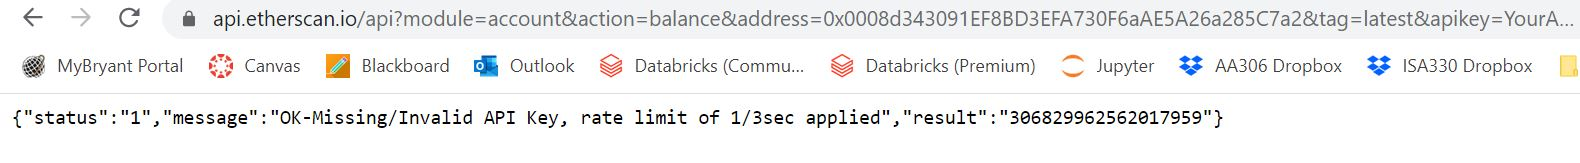

In [1]:
from IPython.display import Image
Image(filename="search.jpg", width=1300, height=400)

    As can be seen from the image above, the 'result' we got is 30682996...
    Now let's look back at the Etherscan address page we saw before (the one that shows all the transactions)

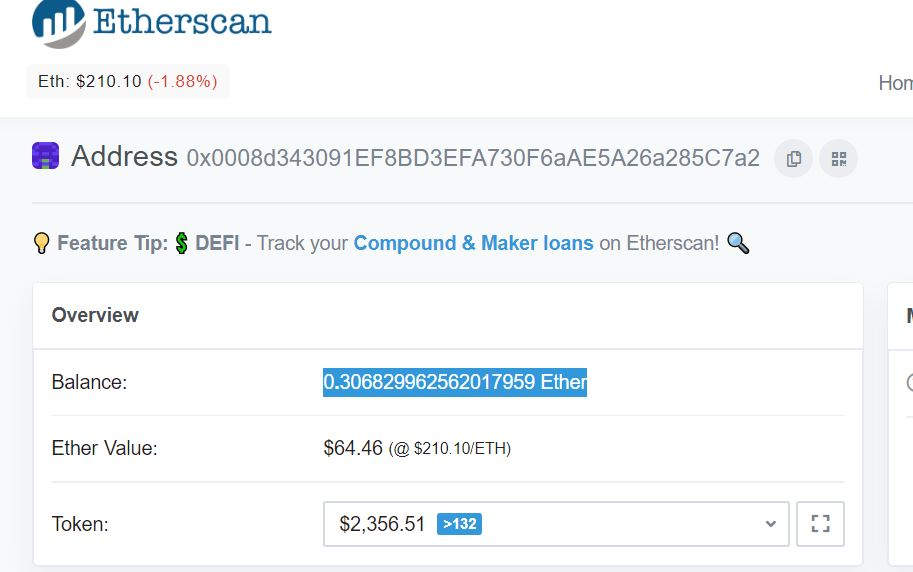

In [2]:
Image(filename="etherscanbal.jpg", width=800, height=300)

In the highlighted field, we can see that the number matches what we found in our results on the other website.

## 2) Let's get a list of 'normal' transactions from this address
https://etherscan.io/apis#accounts - third section
- has two links - first gives you list of last 10,000 transactions, second allows you to set a limit
        - (to change limit, change 'offset=10' in URL to 'offset=x' where x is the number of transactions you want to search for
        - sort=asc - order can also be changed


    1) copy the same address, like before
    2) change order to descending
    2) Installed JSON formatter - made it much more readable
        download from chrome store: https://chrome.google.com/webstore/detail/json-formatter/bcjindcccaagfpapjjmafapmmgkkhgoa/related?hl=en
        extra help links: 
            https://help.github.com/en/github/managing-files-in-a-repository/adding-a-file-to-a-repository
            https://www.mattcutts.com/blog/how-to-install-a-chrome-extension-from-github/
            
            
-----------------

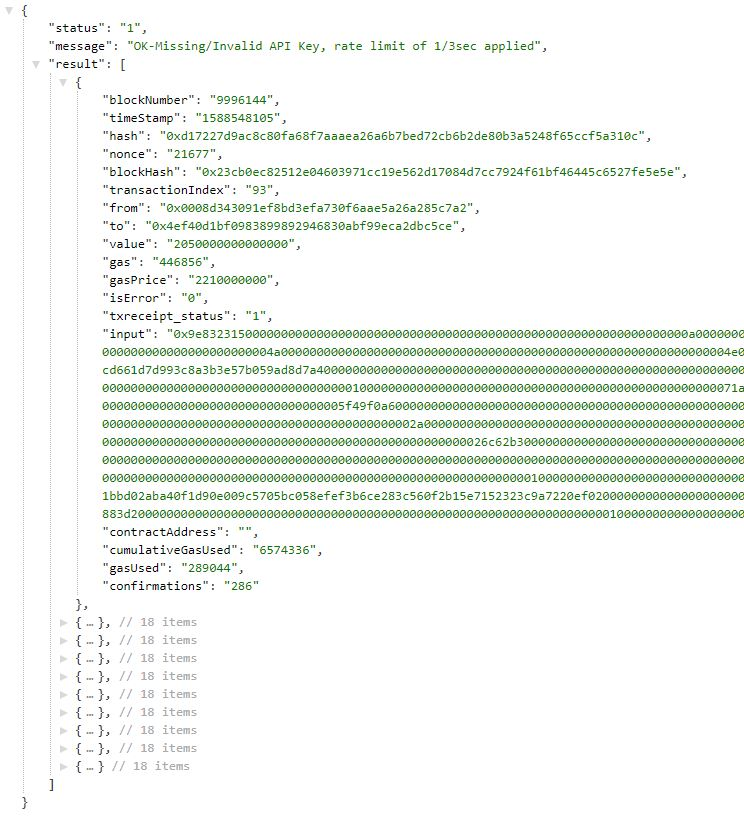

In [3]:
Image(filename="history.jpg", width=800, height=300)

### Here's what the new page looks like (w/ JSON formatter chrome extension)

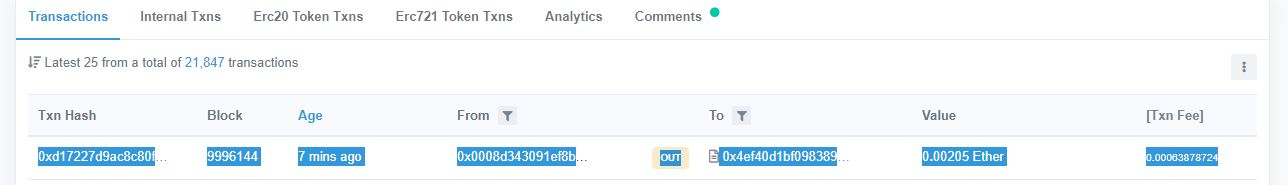

In [4]:
Image(filename="mostrecent.jpg", width=1200, height=300)

    What we're looking at is the past 10 transactions for this wallet (I also have the other 9 most recent, but they're condensed as can be seen by the arrows below)
    We can see that the hash, block, value all match between the two screenshots
-----------------------
    Let's try to do what we just did via Python code:

In [5]:
import requests # the requests module will help us connect to etherscan



address = '0x0008d343091EF8BD3EFA730F6aAE5A26a285C7a2' # wallet address
key =  'MV3PBAW3Y5U9IC3WQKZGX8NTUGS9VAEZ28' # my api key
# change https to http (not encrypted)
url = 'http://api.etherscan.io/api?module=account&action=txlist&address=' + address + \
'&endblock=99999999&page=1&offset=10&sort=desc&apikey=' + key
# cut out default address and add the one you want to search for
"""
NOTE - in the url:
    offset changes the number of records that will be searched (in this case, 10 records)
    sort can change whether you're looking at the most recent transactions or the oldest
"""


# connect to address
response = requests.get(url)
print(response)

<Response [200]>


Response [200] means we're entering a valid URL.  If the program couldn't find it, we would get an error

In [2]:
# print(response.content)

#response.content will show all of the past transactions that we've requested.
#uncomment to see how it works

In [7]:
#print(response.json()) # a cleaner way to request the content? - have not tried

In [8]:
address_content = response.json()
result = address_content.get("result") # get only the result of the transaction
#print(result)

Now, let's try to loop through them

In [1]:
# for transaction in result:
#     print(transaction)

In [10]:
for transaction in result: # this loop will request certain data from each transaction and print it out
    # I believe these are pulling directly from the json text on the website
    hash_ = transaction.get("hash")
    tx_from = transaction.get("from")
    tx_to = transaction.get("to")
    value = transaction.get("value")
    confirmations = transaction.get("confirmations")
    
    print(f"hash: {hash_}\ntransaction from: {tx_from}\ntransaction to: {tx_to}\nvalue: {value}\nconfirmations: {confirmations}\n-----------------------------")

hash: 0x9b6e1adc00089a24738f078840264497a39cc0835bb69d1eb155ef93cece8be0
transaction from: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
transaction to: 0x4ef40d1bf0983899892946830abf99eca2dbc5ce
value: 112750000000000000
confirmations: 978
-----------------------------
hash: 0x082ef1104957cdf976b9461968dc18ae01760049f1d3ab9863bf38cfd41fea8f
transaction from: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
transaction to: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
value: 2935630000000000000
confirmations: 983
-----------------------------
hash: 0x4075c05a5cd23fd35b1a30d711393d2c75ba665b911b2e5435b4c1eaad42a765
transaction from: 0x34872874b65e12408ec0265e9cf0a35fa6c8d13e
transaction to: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
value: 14768000000000000000
confirmations: 999
-----------------------------
hash: 0x205b2c3a356017540f73d86b781f0e4f99e4c1d639b036a10f314bfcecb88eee
transaction from: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
transaction to: 0x4ef40d1bf0983899892946830abf99eca2dbc5ce


In [11]:
# lets try to get data from individual transactions

for n, transaction in enumerate(result): # this loop will request certain data from each transaction and print it out
    # this just adds in transaction ID (n)
    # in this case, transaction ID is relative
    hash_ = transaction.get("hash")
    tx_from = transaction.get("from")
    tx_to = transaction.get("to")
    value = transaction.get("value")
    confirmations = transaction.get("confirmations")
    
    print(f"transaction ID: {n}") # get ID number
    print(f"hash: {hash_}\ntransaction from: {tx_from}\ntransaction to: {tx_to}\nvalue: {value}\nconfirmations: {confirmations}\n-----------------------------")
    print("\n")

transaction ID: 0
hash: 0x9b6e1adc00089a24738f078840264497a39cc0835bb69d1eb155ef93cece8be0
transaction from: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
transaction to: 0x4ef40d1bf0983899892946830abf99eca2dbc5ce
value: 112750000000000000
confirmations: 978
-----------------------------


transaction ID: 1
hash: 0x082ef1104957cdf976b9461968dc18ae01760049f1d3ab9863bf38cfd41fea8f
transaction from: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
transaction to: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
value: 2935630000000000000
confirmations: 983
-----------------------------


transaction ID: 2
hash: 0x4075c05a5cd23fd35b1a30d711393d2c75ba665b911b2e5435b4c1eaad42a765
transaction from: 0x34872874b65e12408ec0265e9cf0a35fa6c8d13e
transaction to: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
value: 14768000000000000000
confirmations: 999
-----------------------------


transaction ID: 3
hash: 0x205b2c3a356017540f73d86b781f0e4f99e4c1d639b036a10f314bfcecb88eee
transaction from: 0x0008d343091ef8bd3efa73

In [12]:
# make a python list with the different features we'll record
test = {'n': [n], 'hash': [hash_], 'from': [tx_from], 'to': [tx_to], 'value': [value], 'confirmations': [confirmations]}

In [13]:
import pandas as pd

test_df = pd.DataFrame(test) # turn list into a DataFrame with one record

In [14]:
test_df

,n,hash,from,to,value,confirmations
0,9,0x9641dd35dc590dc3e46fb76055a572e1a4206f2bc5be...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,61500000000000000,24236


In [55]:
hash_[2:] # index slicing - maybe useful later on if we use this for a lot of records

'7173218290e224d6461b6d55ce3c8921d85b0adb5e1fc769a9676bbe6070130b'

Now, let's try to loop through and add each item to a DataFrame after every iteration

In [60]:
test_df = pd.DataFrame(columns=['ID', 'Hash', 'From', 'To', 'Value', 'Confirmations'])
test_df # overwrite test_df and make it only contain the columns we're recording

,ID,Hash,From,To,Value,Confirmations


In [62]:
# lets try to get data from individual transactions
for n, transaction in enumerate(result):
    # this will loop through and get the data we want from each record and then store it in test_df
    hash_ = transaction.get("hash")
    tx_from = transaction.get("from")
    tx_to = transaction.get("to")
    value = transaction.get("value")
    confirmations = transaction.get("confirmations")

    #new_data = [n, hash_, tx_from, tx_to, value, confirmations]
    test_df = test_df.append({'ID': n, 'Hash': hash_, 'From': tx_from, 'To': tx_to, 'Value': value, 'Confirmations': confirmations}, ignore_index = True)

test_df


,ID,Hash,From,To,Value,Confirmations
0,0,0x9b6e1adc00089a24738f078840264497a39cc0835bb6...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,112750000000000000,534
1,1,0x082ef1104957cdf976b9461968dc18ae01760049f1d3...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2935630000000000000,539
2,2,0x4075c05a5cd23fd35b1a30d711393d2c75ba665b911b...,0x34872874b65e12408ec0265e9cf0a35fa6c8d13e,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,14768000000000000000,555
3,3,0x205b2c3a356017540f73d86b781f0e4f99e4c1d639b0...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,128125000000000000,6806
4,4,0x0a2cc10ce173476ca597098a398c1fb27a1ead32ad3c...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,153750000000000000,20220
5,5,0xc84aa54858cc67bacafde2123e4d2fdce3bde07a8ead...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,153750000000000000,22885
6,6,0x81df3063e278e9a962b344d0890f7bd56f2c3ab2af32...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,451000000000000000,22887
7,7,0x891b02c691df012b9f5314c8aa49a31ea4fb13c5ed21...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,425272500000000000,23275
8,8,0x2eef8cc199fa6c980232043bbe928f8efa78ab596e1f...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,61500000000000000,23753
9,9,0x9641dd35dc590dc3e46fb76055a572e1a4206f2bc5be...,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,61500000000000000,23792


## The other notebook in this file will attempt to do something similar with ERC721 tokens